## **Importing files and libraries**

### Libraries

In [1]:
# For Data
import pandas as pd
import numpy as np

import os

# Graphics
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy import fftpack

### Files

#### Load

In [2]:
# Verificar el directorio actual
print("Directorio actual:", os.getcwd())

# Cambiar al directorio superior (bajar un nivel)
os.chdir('../..')

# Verificar el nuevo directorio
print("Nuevo directorio actual:", os.getcwd())

Directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails\Codes\Past
Nuevo directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails


In [3]:
#Function for simply the files load
def dir(r_or_p, year):
    rp = ("Raw", "Calibrated",)
    r_or_p = r_or_p.strip().capitalize()
    if r_or_p not in rp: #Validate data
        raise NameError("Only Raw or Processed")

    if r_or_p == rp[0]:
      dir = f"Data/Raw_converter/{year}.parquet"
      return dir

    else:
      dir = f"Data/Processing_converter/{year}.parquet"

      return dir



In [4]:
#Years that have a analysis
i_year = 1998
f_year = 2023
step_year = 5
other_year = 2000

years = [year for year in range(i_year, f_year + step_year, step_year)] #+ [other_year]

years.sort()

years

[1998, 2003, 2008, 2013, 2018, 2023]

#### Raw data

In [5]:
Raw_data = {}
for year in years:
  Raw_data[year] = pd.read_parquet(dir("Raw",year))


Raw_data

{1998:         YY  MON  DY  DOY:HH:MM:SS     Seconds  SPEED     Np  Vth  N/S  V_He  \
 0       98  Jan   1  001:00:00:30        30.0    361  10.08   32 -0.5   370   
 1       98  Jan   1  001:00:01:00        60.0    358  10.21   31  0.0   366   
 2       98  Jan   1  001:00:01:30        90.0    362  10.08   32 -0.0   371   
 3       98  Jan   1  001:00:02:00       120.0    360  10.09   32 -0.3   369   
 4       98  Jan   1  001:00:02:30       150.0    358  10.71   30 -0.7   366   
 ...     ..  ...  ..           ...         ...    ...    ...  ...  ...   ...   
 619716  98  Dec  21  355:17:27:16  30648436.0    318  13.51   23  5.3   320   
 619717  98  Dec  21  355:17:27:46  30648466.0    317  13.47   23  5.1   320   
 619718  98  Dec  21  355:17:28:16  30648496.0    319  13.08   23  5.1   322   
 619719  98  Dec  21  355:17:28:46  30648526.0    319  11.60   23  5.0   322   
 619720  98  Dec  21  355:17:29:16  30648556.0    324  10.40   23  4.5   327   
 
         GSE_X  GSE_Y  GSE_Z  RA

#### Processed/ Calibrated data

In [6]:
Calibrated_data = {}
for year in years:
  Calibrated_data[year] = pd.read_parquet(dir("Calibrated",year))


Calibrated_data

{1998:        YY  MON  DY  DOY:HH:MM:SS     Seconds  SPEED     Np  Vth  N/S  V_He  \
 0      98  Jan   1  001:00:05:02       302.0    371  10.08   35 -0.8   383   
 1      98  Jan   1  001:00:10:03       603.0    371   9.80   35 -0.9   383   
 2      98  Jan   1  001:00:15:05       905.0    370   9.00   36  0.3   383   
 3      98  Jan   1  001:00:20:11      1211.0    372   7.25   38  1.5   387   
 4      98  Jan   1  001:00:25:10      1510.0    370   8.36   37  0.3   384   
 ...    ..  ...  ..           ...         ...    ...    ...  ...  ...   ...   
 62155  98  Dec  21  355:17:07:38  30647258.0    336  15.01   24  5.6   338   
 62156  98  Dec  21  355:17:12:39  30647559.0    332  14.50   23  3.8   335   
 62157  98  Dec  21  355:17:17:41  30647861.0    334  13.97   24  3.9   337   
 62158  98  Dec  21  355:17:22:43  30648163.0    334  14.58   23  4.7   337   
 62159  98  Dec  21  355:17:27:46  30648466.0    333  13.76   23  4.9   335   
 
        GSE_X  GSE_Y  GSE_Z  RANGE  HGLAT  H

# **Analitic**

In [7]:
data = Raw_data[2003]

In [25]:
def f_analytical_exp(x):#, a, b, c, d):
    a = 4e8
    b = 1e9
    c = 0
    d = 1e4
    e = 5e4
    f = 0
    g = 1e4
    h = 1e1
    i = 0
    return (a*( (np.exp(-b*((x-c)**2))) + (np.exp(f - (e*x))) )) + (g*(np.exp(i - (h*x)))) + d

def f_analytical_ln(x):#, a, b, c, d, e):
    a = 1e5
    b = 1e5
    c = 1
    d = 0
    e = 1e-300
    return a - (b*np.log(e + (c*((x-d)**2))))



In [26]:
f_analytical_exp(0)

800020000.0

In [10]:
from scipy.fft import fft, fftfreq
from numpy.polynomial import Polynomial

# Datos de la FFT
speed = data["SPEED"]
N = len(speed)
T = 30  # Intervalo de tiempo en segundos
t = np.linspace(0, (N-1)*T, N)
x = fft(speed)
fs = 1 / T  # Frecuencia de muestreo
f = fftfreq(N, d=T)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


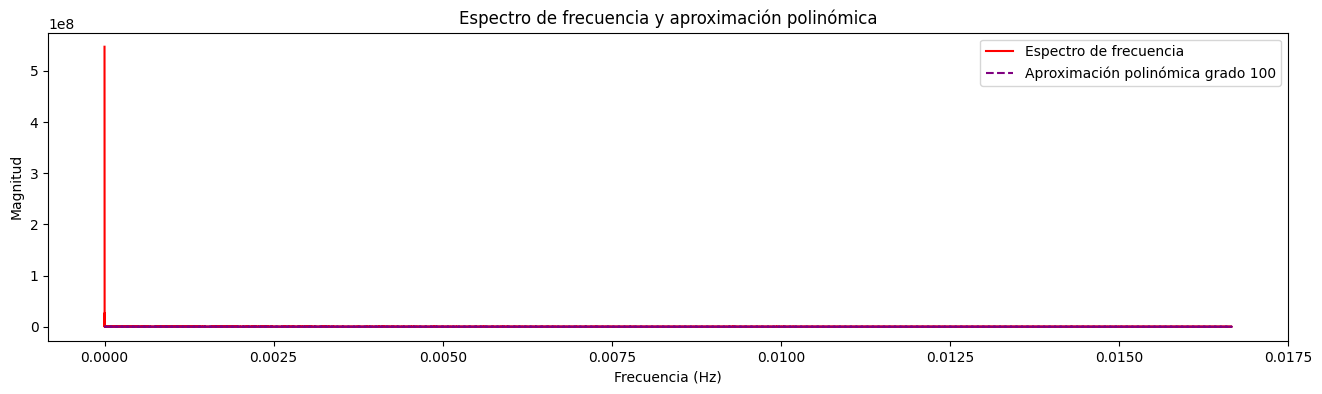

In [11]:


# Aproximación polinómica
grado = 100  # Define el grado del polinomio, ajusta según sea necesario
polinomio_aproximado = Polynomial.fit(f, np.abs(x), grado)

# Graficar el espectro de frecuencia y la aproximación polinómica
plt.figure(figsize=(16, 4))
plt.plot(np.abs(f), np.abs(x), color="red", label="Espectro de frecuencia")
plt.plot(np.abs(f), np.abs(polinomio_aproximado(f)), color="purple", linestyle='--', label=f'Aproximación polinómica grado {grado}')
#plt.xscale("symlog")
#plt.yscale("symlog")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de frecuencia y aproximación polinómica')
plt.legend()
plt.show()

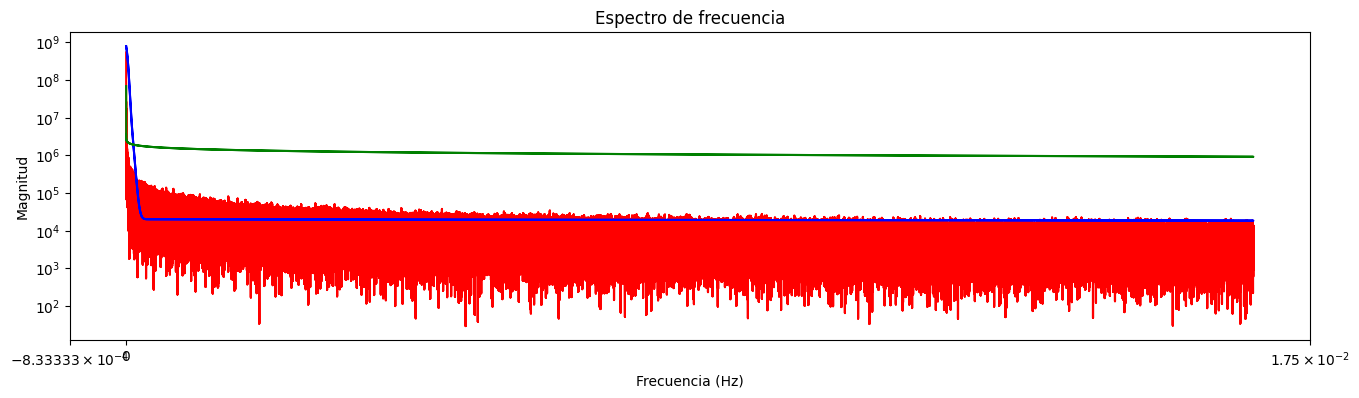

In [27]:
speed = data["SPEED"]
N = len(speed)
T = 30 # Seconds
t = np.linspace(0, (N-1)*T, N)
x  = fftpack.fft(speed)
fs = 1/T # Frequency
f = fftpack.fftfreq(N)*fs

plt.figure(figsize=(16, 4))
plt.plot(np.abs(f), np.abs(x), color="red")
plt.plot(np.abs(f), f_analytical_exp(np.abs(f)), color="blue")
plt.plot(np.abs(f), f_analytical_ln(np.abs(f)), color="green")
#plt.xlim(-0.0001, 0.0001)  # Ajusta los límites del eje x para zoom en el rango de frecuencias deseado
#plt.ylim(0 , 0.1e8)
plt.xscale("symlog")
plt.yscale("symlog")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de frecuencia')
plt.show()

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


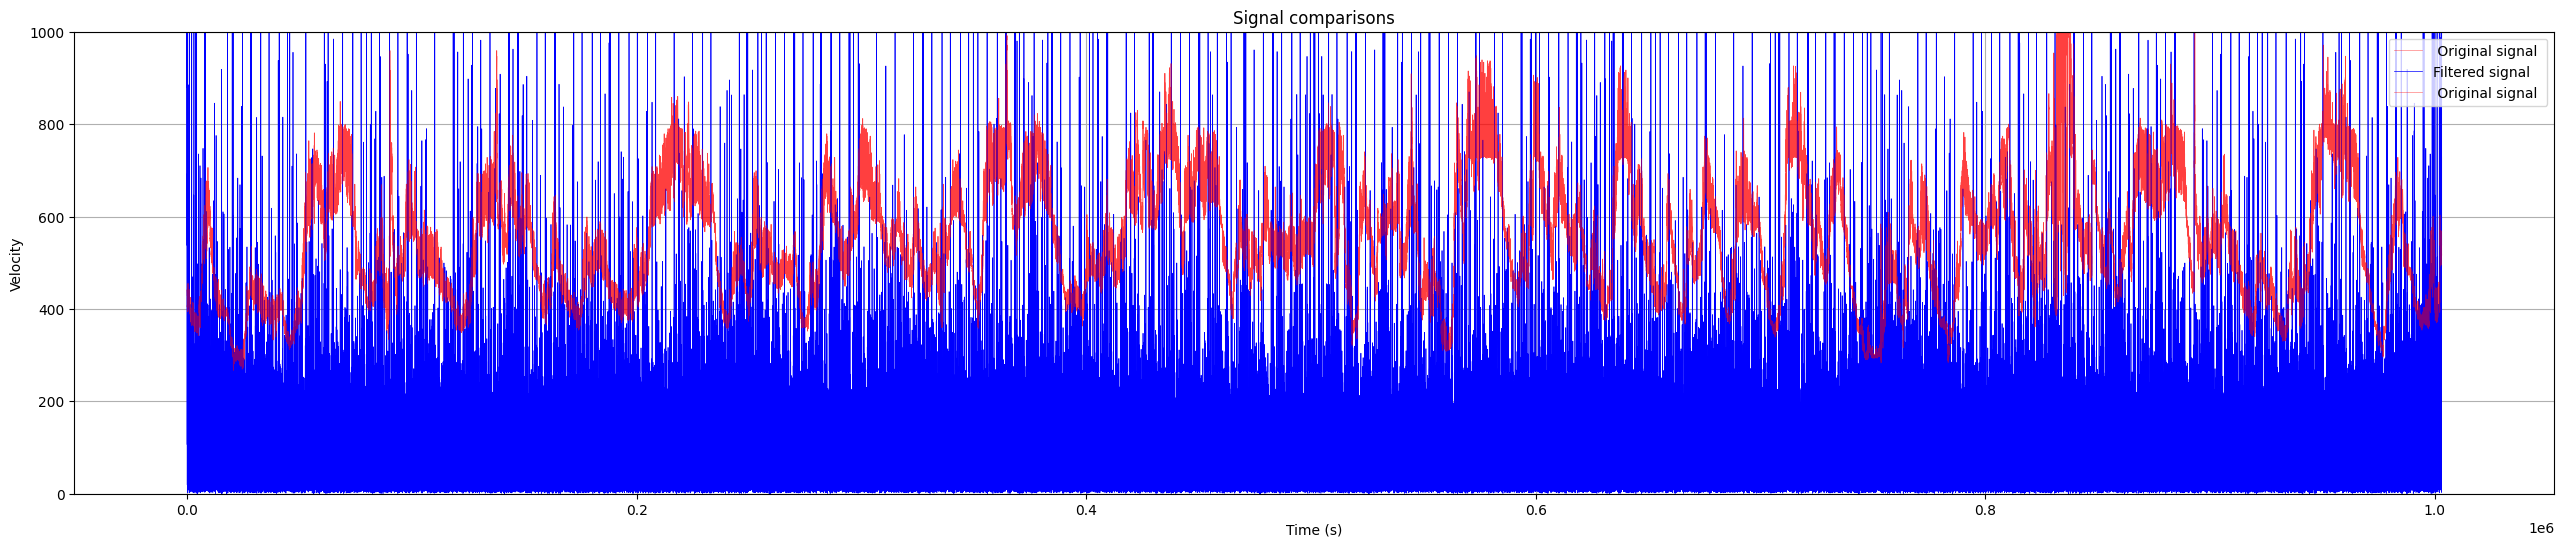

In [13]:
y_filtered = fftpack.ifft(f_analytical_exp(np.abs(f)))
y_filtered = fftpack.ifft(np.full(len(f), np.max(np.abs(f))))

# Displaying signal
plt.figure(figsize=(32,6))
plt.plot(speed, label= " Original signal ", linewidth = 0.5, color= "red", alpha=0.5)
plt.plot(np.abs(y_filtered)*1e22, label = "Filtered signal",linewidth = 0.5, color= "blue")
plt.plot(speed, label= " Original signal ", linewidth = 0.5, color= "red", alpha=0.5)
#plt.plot(speed_filtred2.real, label = "Filtered signal",linewidth = 0.5, color= "green")
plt.xlabel("Time (s)")
plt.ylabel("Velocity")
plt.ylim(0 , 1000)
#plt.yscale("log")
plt.legend()
plt.title("Signal comparisons")
plt.grid(True)
plt.show()

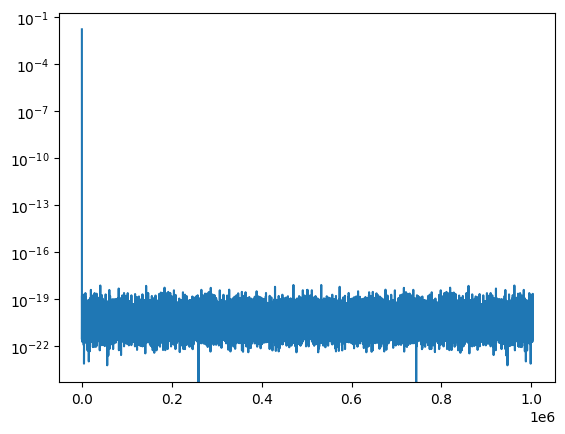

In [14]:
plt.plot(np.abs(y_filtered))
plt.yscale("log")
plt.show()

In [15]:
f_analytical = [f_analytical_exp]#, f_analytical_ln]

for ec in f_analytical:

    param, cov = curve_fit(ec, np.abs(f), np.abs(x)) #

    incert = np.sqrt(np.diag(cov))

    print(param)
    print(incert)

    y = np.array([ec(i, *param) for i in f])

    plt.figure(figsize=(16, 8))
    
    plt.plot(np.abs(f), np.abs(x), color="red")
    plt.plot(np.abs(y), color="blue")
    
    plt.xscale("symlog")
    plt.yscale("symlog")
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title('Espectro de frecuencia')
    plt.grid(True)
    plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
    plt.show()

ValueError: Unable to determine number of fit parameters.